<a href="https://colab.research.google.com/github/MohamedWael45/RFM/blob/main/RFM_VeryFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import random
import numpy as np
import pandas as pd
import os
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
url="https://raw.githubusercontent.com/MohamedWael45/RFM/main/RFMwithExcel.xlsx"
df=pd.read_excel(url)

In [39]:
df2 = pd.read_excel(url, sheet_name="Customer RFM Analysis")
df2.head()

,NOTE - The original Recency calculation was incorrect. This worksheet has the corrected calculation.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
2,11000,2013-05-03 00:00:00,288,3,8248.99,2,9,9
3,11001,2013-12-10 00:00:00,67,3,6383.88,8,9,9
4,11002,2013-02-23 00:00:00,357,3,8114.04,0,9,9


In [41]:
new_column_names = [
    "CustomerID", "MostRecentOrderDate", "DaysSinceLastOrder",
    "SalesOrderCount", "TotalSalesAmount", "Recency", "Frequency", "Monetary"]
df2.columns = new_column_names
df2.head()
df2 = df2.drop(df2.index[0])
df2 = df2.drop(df2.index[1])
print(df2)

      CustomerID  MostRecentOrderDate DaysSinceLastOrder SalesOrderCount  \
3          11001  2013-12-10 00:00:00                 67               3   
5          11003  2013-05-10 00:00:00                281               3   
6          11004  2013-05-01 00:00:00                290               3   
7          11005  2013-05-02 00:00:00                289               3   
8          11006  2013-05-14 00:00:00                277               3   
...          ...                  ...                ...             ...   
18481      29479  2012-09-04 00:00:00                529               1   
18482      29480  2013-07-17 00:00:00                213               1   
18483      29481  2011-08-13 00:00:00                917               1   
18484      29482  2012-09-18 00:00:00                515               1   
18485      29483  2012-09-09 00:00:00                524               1   

      TotalSalesAmount Recency Frequency Monetary  
3              6383.88       8     

In [42]:
df2['DaysSinceLastOrder'] = pd.to_numeric(df2['DaysSinceLastOrder'], errors='coerce')
df2['TotalSalesAmount'] = df2['TotalSalesAmount'].apply(lambda x: int(round(x)))
try:
  df2['SalesOrderCount'] = pd.to_numeric(df2['SalesOrderCount'], errors='coerce')
except ValueError:
  print("Warning: 'SalesOrderCount' column contains non-numeric values and cannot be converted to int.")
df2['Recency'] = pd.to_numeric(df2['Recency'], errors='coerce')
df2['Frequency'] = pd.to_numeric(df2['Frequency'], errors='coerce')
df2['Monetary'] = pd.to_numeric(df2['Monetary'], errors='coerce')
print(df2.dtypes)

CustomerID             object
MostRecentOrderDate    object
DaysSinceLastOrder      int64
SalesOrderCount         int64
TotalSalesAmount        int64
Recency                 int64
Frequency               int64
Monetary                int64
dtype: object


In [43]:
columns_of_interest = ["CustomerID"]

# Iterate through each column in the list of columns of interest
for column in columns_of_interest:
    # Find duplicates in the current column
    duplicates = df2[column].duplicated()

    # Print the column name and the duplicate values
    print(f"Column: {column}")
    print(df2[duplicates])

Column: CustomerID
Empty DataFrame
Columns: [CustomerID, MostRecentOrderDate, DaysSinceLastOrder, SalesOrderCount, TotalSalesAmount, Recency, Frequency, Monetary]
Index: []


In [44]:
empty_entries = df2.isnull().sum().sum()

if empty_entries > 0:
    print("There are empty entries in the DataFrame.")
else:
    print("There are no empty entries in the DataFrame.")

There are no empty entries in the DataFrame.


In [45]:
recency_value = 9
while recency_value >= 0:
    max_days_since_last_order = df2.loc[df2['Monetary'] == recency_value, 'TotalSalesAmount'].min()
    print(f"Maximum value of DaysSinceLastOrder when Recency is {recency_value}: {max_days_since_last_order}")
    recency_value -= 1

Maximum value of DaysSinceLastOrder when Recency is 9: 4828
Maximum value of DaysSinceLastOrder when Recency is 8: 3272
Maximum value of DaysSinceLastOrder when Recency is 7: 2330
Maximum value of DaysSinceLastOrder when Recency is 6: 1156
Maximum value of DaysSinceLastOrder when Recency is 5: 271
Maximum value of DaysSinceLastOrder when Recency is 4: 92
Maximum value of DaysSinceLastOrder when Recency is 3: 66
Maximum value of DaysSinceLastOrder when Recency is 2: 40
Maximum value of DaysSinceLastOrder when Recency is 1: 25
Maximum value of DaysSinceLastOrder when Recency is 0: 2


In [46]:
df2.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=True, inplace=True)
print(df2)

     CustomerID  MostRecentOrderDate  DaysSinceLastOrder  SalesOrderCount  \
1516      12514  2013-02-14 00:00:00                 366                1   
1726      12724  2013-02-01 00:00:00                 379                1   
1839      12837  2013-02-10 00:00:00                 370                1   
1908      12906  2013-02-16 00:00:00                 364                1   
2277      13275  2013-02-10 00:00:00                 370                1   
...         ...                  ...                 ...              ...   
4662      15660  2013-12-25 00:00:00                  52                3   
4689      15687  2013-12-26 00:00:00                  51                3   
7143      18141  2013-12-16 00:00:00                  61                3   
7149      18147  2013-12-19 00:00:00                  58                3   
7170      18168  2013-12-18 00:00:00                  59                3   

      TotalSalesAmount  Recency  Frequency  Monetary  
1516                

In [47]:
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_values = (column - min_val) / (max_val - min_val)
    return normalized_values

# Apply min-max normalization to the columns 'Recency', 'Frequency', and 'Monetary'
df2['Recency_normalized'] = min_max_normalization(df2['Recency'])
df2['Frequency_normalized'] = min_max_normalization(df2['Frequency'])
df2['Monetary_normalized'] = min_max_normalization(df2['Monetary'])


Execution Time: 0.011031389236450195 seconds


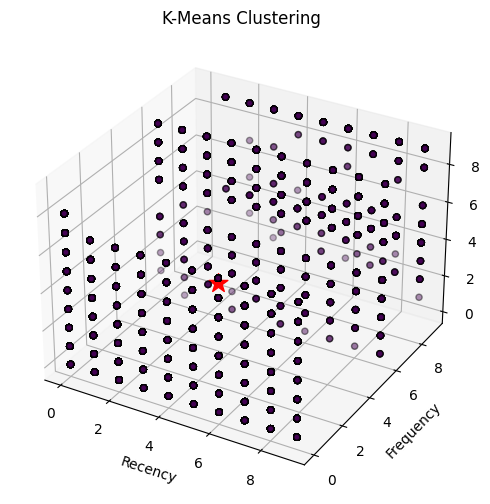

Cluster name: High recency, low frequency, low monetary
Number of data points: 18482
Number of clusters: 1
Number of iterations: 2


"ax = fig.add_subplot(111, projection='3d')\nax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')\n\nax.set_xlabel('Recency')\nax.set_ylabel('Frequency')\nax.set_zlabel('Monetary')\nplt.title('K-Means Clustering')\nplt.show()"

In [49]:
X = df2[['Recency', 'Frequency', 'Monetary']]
initial_centroids = np.array([0, 5, 4]).reshape(1, -1)
start_time = time.time()
kmeans = KMeans(n_clusters=1, init=initial_centroids, n_init=1, max_iter=10, random_state=42)
kmeans.fit(X)
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='*', s=200)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()

# Naming the cluster based on its characteristics
cluster_name = "High recency, low frequency, low monetary"


# Printing the cluster name and the number of data points in it
print(f"Cluster name: {cluster_name}")
print(f"Number of data points: {len(labels)}")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Number of iterations: {kmeans.n_iter_}")

'''ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()'''

Number of clusters: 10


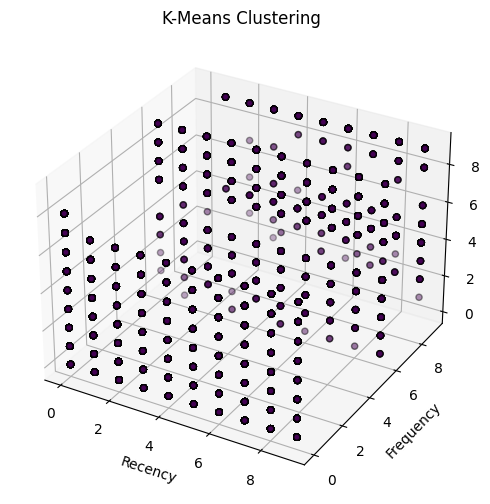

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [12]:
# Creating the KMeans model with 10 clusters and 'k-means++' initialization
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=10, random_state=42)
# Creating an array of shape (10, 3) with some random values for the initial centroids
initial_centroids = np.array([[0, 5, 4], [1, 6, 3], [2, 7, 2], [3, 8, 1], [4, 9, 0], [5, 4, 5], [6, 3, 6], [7, 2, 7], [8, 1, 8], [9, 0, 9]])

# Creating the KMeans model with 10 clusters and the custom array as the initial centroids
kmeans = KMeans(n_clusters=10, init=initial_centroids, n_init=1, max_iter=10, random_state=42)


# Printing the number of clusters, iterations, and silhouette score
print(f"Number of clusters: {kmeans.n_clusters}")


# Creating a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')


ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()
#likkkeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Creating a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Setting the x-axis limits
ax.set_xlim([-0.1, 1])

# Setting the y-axis limits
ax.set_ylim([0, len(X) + (10 + 1) * 10])

# Plotting the silhouette scores for each data point
y_lower = 10
for i in range(10):
    # Selecting the silhouette scores for the ith cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    # Sorting the silhouette scores in descending order
    ith_cluster_silhouette_values.sort()

    # Calculating the size of the ith cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # Defining the y-axis position for the ith cluster
    y_upper = y_lower + size_cluster_i

    # Choosing a color for the ith cluster
    color = plt.cm.nipy_spectral(float(i) / 10)

    # Filling the area with the silhouette scores for the ith cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Labeling the silhouette plot with the cluster number
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Updating the y_lower for the next cluster
    y_lower = y_upper + 10

# Labeling the silhouette plot with the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.text(0.05, 0.9, 'Average silhouette score: {:.2f}'.format(silhouette_avg),
        transform=ax.transAxes)

# Setting the x-axis label
ax.set_xlabel("Silhouette coefficient values")

# Setting the y-axis label
ax.set_ylabel("Cluster label")

# Removing the y-axis ticks
ax.set_yticks([])

# Setting the title
ax.set_title("Silhouette plot for the various clusters")

# Showing the plot
plt.show()

Cluster labels: [0 0 0 ... 1 1 1]


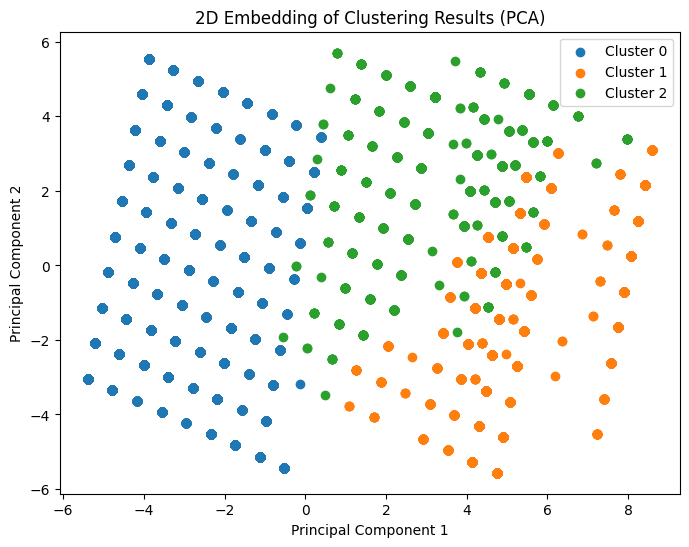

"plt.figure(figsize=(8, 6))\n\n# Scatter plot for each cluster\nfor cluster in df2['Cluster'].unique():\n    plt.scatter(df2[df2['Cluster'] == cluster]['Recency_normalized'],\n                df2[df2['Cluster'] == cluster]['Frequency_normalized'],\n                label=f'Cluster {cluster}')\n\n# Plot the centroids\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')\nplt.xlabel('Recency')\nplt.ylabel('Frequency')\nplt.title('K-means Clustering')\nplt.legend()\nplt.show()"

In [50]:

median_R2 = df2['Recency_normalized'].median()
median_F2 = df2['Frequency_normalized'].median()
median_M2 = df2['Monetary_normalized'].median()

# Create initial centroids as the medians of each column
initial_centroids = np.array([[median_R2, median_F2, median_M2]])

# Define the number of clusters (k)
k = 3  # Change this to the desired number of segments

# Repeat median calculation k-1 times to get k initial centroids
for _ in range(k-1):
    median_R2 = df2['Recency_normalized'].median()
    median_F2 = df2['Frequency_normalized'].median()
    median_M2 = df2['Monetary_normalized'].median()
    initial_centroids = np.append(initial_centroids, [[median_R2, median_F2, median_M2]], axis=0)

# Perform K-means clustering with the initial centroids
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
kmeans.fit(df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']])

# Print the cluster labels
print("Cluster labels:", kmeans.labels_)


df2['Cluster'] = kmeans.labels_

# Visualize the clusters

'''colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for cluster, color in colors.items():
    cluster_data = df2[df2['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Monetary'], color=color, label=f'Cluster {cluster}')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('K-Means Clustering Results')
plt.legend()

# Show the plot
plt.show()'''


import seaborn as sns
from sklearn.decomposition import PCA


X = df2[['Recency', 'Frequency', 'Monetary']]

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D embedding with cluster assignments
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X_pca[df2['Cluster'] == cluster, 0], X_pca[df2['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('2D Embedding of Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()





'''plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in df2['Cluster'].unique():
    plt.scatter(df2[df2['Cluster'] == cluster]['Recency_normalized'],
                df2[df2['Cluster'] == cluster]['Frequency_normalized'],
                label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-means Clustering')
plt.legend()
plt.show()'''

In [51]:

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Get number of iterations
num_iterations = kmeans.n_iter_

# Calculate median of each cluster

# Assuming 'kmeans' is your KMeans clustering model

# Get the cluster labels
cluster_labels = kmeans.labels_

# Initialize lists to store statistics for each cluster
cluster_sizes = []
cluster_centroids = []
cluster_medians = []
cluster_std = []
cluster_means = []

# Loop through each cluster
for cluster in range(k):
    # Filter data points belonging to the current cluster
    cluster_data = X[cluster_labels == cluster]

    # Compute statistics
    cluster_size = len(cluster_data)
    cluster_centroid = kmeans.cluster_centers_[cluster]
    cluster_median = np.median(cluster_data, axis=0)


    # Append statistics to respective lists
    cluster_sizes.append(cluster_size)
    cluster_centroids.append(cluster_centroid)
    cluster_medians.append(cluster_median)


    # Print statistics for the current cluster
    print(f"Cluster {cluster} - Size: {cluster_size}, Centroid: {cluster_centroid}, Median: {cluster_median}")

# Get the number of iterations
num_iterations = kmeans.n_iter_
print(f"Number of Iterations: {num_iterations}")








'''medians = []
for cluster_label in range(k):
    cluster_data = X[labels == cluster_label]
    cluster_median = np.median(cluster_data, axis=0)
    medians.append(cluster_median)

# Get size of each cluster
cluster_sizes = [np.sum(labels == cluster_label) for cluster_label in range(k)]

# Print results
print("Centroids:")
print(centroids)
print("Number of Iterations:", num_iterations)
print("Cluster Sizes:", cluster_sizes)
print("Medians of Each Cluster:")
for i, median in enumerate(medians):
    print("Cluster {}: {}".format(i, median))'''

Cluster 0 - Size: 11620, Centroid: [4.63425129e-01 5.73723465e-05 3.50545037e-01], Median: [4. 0. 3.]
Cluster 1 - Size: 4513, Centroid: [0.4613093  0.73720363 0.88812566], Median: [4. 6. 8.]
Cluster 2 - Size: 2349, Centroid: [0.77020955 0.73109124 0.47046024], Median: [7. 6. 4.]
Number of Iterations: 8


'medians = []\nfor cluster_label in range(k):\n    cluster_data = X[labels == cluster_label]\n    cluster_median = np.median(cluster_data, axis=0)\n    medians.append(cluster_median)\n\n# Get size of each cluster\ncluster_sizes = [np.sum(labels == cluster_label) for cluster_label in range(k)]\n\n# Print results\nprint("Centroids:")\nprint(centroids)\nprint("Number of Iterations:", num_iterations)\nprint("Cluster Sizes:", cluster_sizes)\nprint("Medians of Each Cluster:")\nfor i, median in enumerate(medians):\n    print("Cluster {}: {}".format(i, median))'

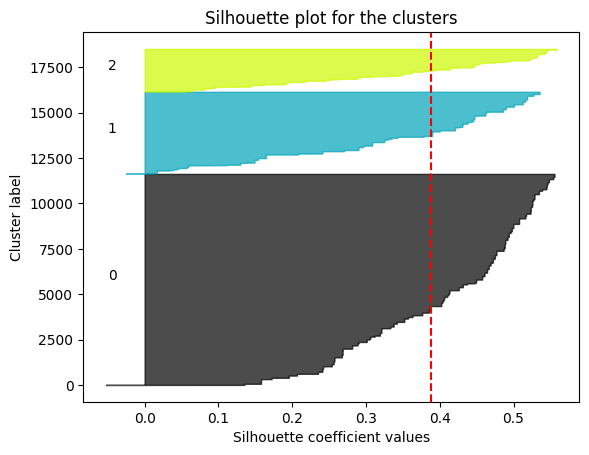

Average silhouette score: 0.38838624576058933
Average silhouette width: 0.38838624576058933


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate silhouette score for each sample
silhouette_values = silhouette_samples(X, labels)

# Calculate overall silhouette score
average_silhouette_score = silhouette_score(X, labels)

# Create a bar plot
y_lower = 10
for i in range(k):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=average_silhouette_score, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for the clusters")
plt.show()
print("Average silhouette score:", average_silhouette_score)
print("Average silhouette width:", np.mean(silhouette_values))


Execution Time: 0.14376616477966309 seconds


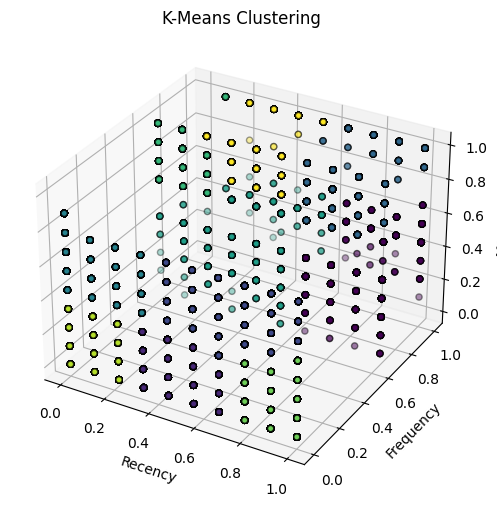

In [53]:
X = df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']]
initial_centroids = X.median().values.reshape(1, -1)
start_time = time.time()
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=4, random_state=42)
kmeans.fit(X)
end_time = time.time()
execution_time = end_time - start_time


print("Execution Time:", execution_time, "seconds")

labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency_normalized'], X['Frequency_normalized'], X['Monetary_normalized'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

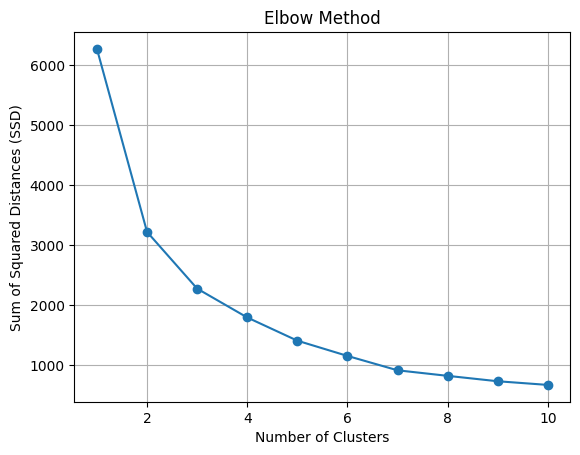

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[2.46523717e-01 7.06822612e-01 8.47260126e-01]
 [7.77524924e-01 6.93889390e-15 1.46438376e-01]
 [1.80714741e-01 7.66053887e-15 6.33158230e-01]
 [2.23961245e-01 7.45295323e-04 1.49400658e-01]
 [7.75276885e-01 7.10542736e-15 6.06696269e-01]
 [7.62262873e-01 7.53252033e-01 3.73915989e-01]
 [7.56719417e-01 7.51318764e-01 8.76622289e-01]]
Silhouette Score: 0.4298115873483575
Number of iterations: 6


In [54]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']])
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters based on the elbow plot
# From the plot, choose the number of clusters where the decrease in SSD slows down (elbow point)

# Perform K-means clustering with the optimal number of clusters
optimal_num_clusters = 7  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']])

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)
#####################################################
silhouette_avg = silhouette_score(df2[['Recency', 'Frequency', 'Monetary']], cluster_labels)
print("Silhouette Score:", silhouette_avg)
silhouette_samples_values = silhouette_samples(df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']], cluster_labels)

num_iterations = kmeans.n_iter_
print("Number of iterations:", num_iterations)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


exc:  1.4171371459960938


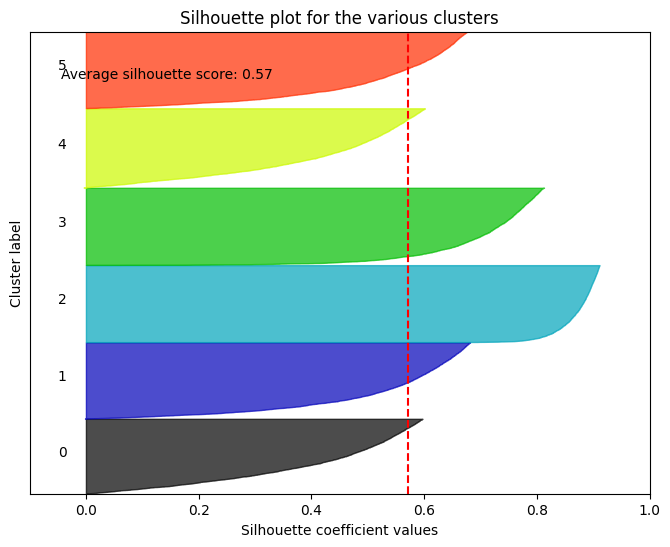

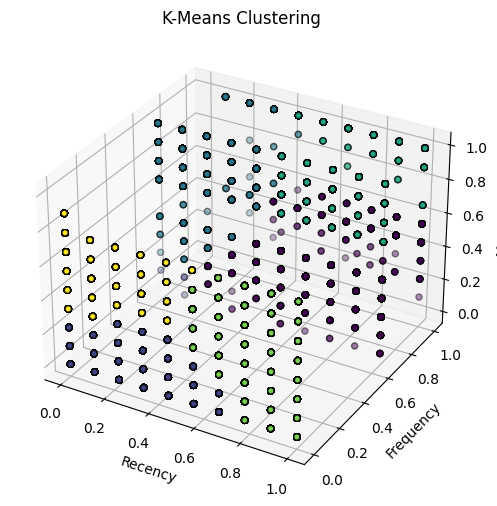

In [61]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=18484, centers=6, random_state=42)

# Number of desired clusters (experiment with different values)
n_clusters = 6

# KMeans clustering
start_time = time.time()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
end_time = time.time()
execution_time = end_time-start_time
print("exc: ", execution_time)
# Silhouette coefficient calculation
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_values = silhouette_samples(X, kmeans.labels_)

# Creating a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Setting the x-axis limits
ax.set_xlim([-0.1, 1])

# Setting the y-axis limits
ax.set_ylim([0, len(X)])

# Plotting the silhouette scores for each data point
y_lower = 10
for i in range(n_clusters):
    # Selecting silhouette scores for the ith cluster
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]

    # Checking if the cluster is not empty
    if ith_cluster_silhouette_values.size == 0:
        continue

    # Sorting silhouette scores in descending order
    ith_cluster_silhouette_values.sort()  # Descending order

    # Size of the ith cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # y-axis position for the ith cluster
    y_upper = y_lower + size_cluster_i

    # Color for the ith cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters)

    # Filling area with silhouette scores for ith cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Labeling the silhouette plot with cluster number
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Updating y_lower for the next cluster
    y_lower = y_upper + 10

# Labeling with average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.text(0.05, 0.9, 'Average silhouette score: {:.2f}'.format(silhouette_avg),
        transform=ax.transAxes)

# Setting x and y-axis labels
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Removing y-axis ticks
ax.set_yticks([])

# Setting the title
ax.set_title("Silhouette plot for the various clusters")

# Showing the plot
plt.show()

X = df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']]
initial_centroids = X.median().values.reshape(1, -1)
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=1, max_iter=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency_normalized'], X['Frequency_normalized'], X['Monetary_normalized'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()

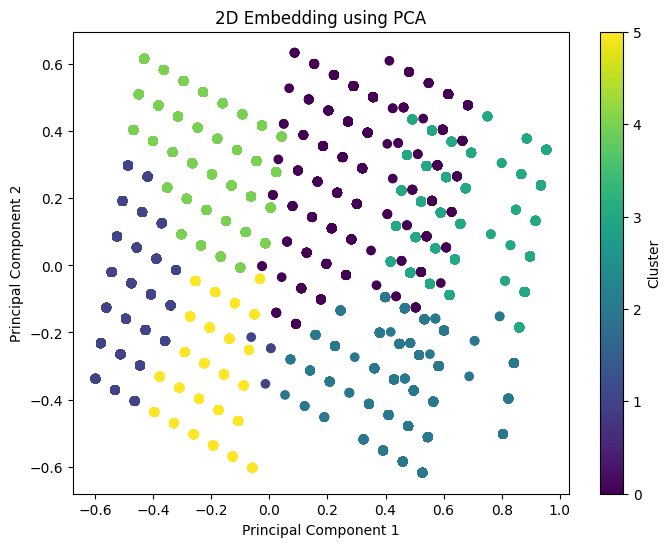

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('2D Embedding using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [20]:
cluster_sizes = []
cluster_centroids = []
cluster_medians = []
cluster_std = []
cluster_means = []

# Loop through each cluster
for cluster in range(n_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = X[kmeans.labels_ == cluster]

    # Compute statistics
    cluster_size = len(cluster_data)
    cluster_centroid = kmeans.cluster_centers_[cluster]
    cluster_median = np.median(cluster_data, axis=0)

    # Append statistics to respective lists
    cluster_sizes.append(cluster_size)
    cluster_centroids.append(cluster_centroid)
    cluster_medians.append(cluster_median)

    # Print statistics for the current cluster
    print(f"Cluster {cluster} - Size: {cluster_size}, Centroid: {cluster_centroid}, Median: {cluster_median}")

# Get the number of iterations
num_iterations = kmeans.n_iter_
print(f"Number of Iterations: {num_iterations}")

Cluster 0 - Size: 1640, Centroid: [0.76146975 0.75314657 0.37359589], Median: [0.77777778 0.66666667 0.44444444]
Cluster 1 - Size: 4162, Centroid: [3.44434046e-01 3.11963812e-04 1.14750689e-01], Median: [0.33333333 0.         0.11111111]
Cluster 2 - Size: 2446, Centroid: [0.2368947  0.69255928 0.8398292 ], Median: [0.22222222 0.66666667 0.88888889]
Cluster 3 - Size: 2773, Centroid: [0.74331851 0.76199062 0.8819169 ], Median: [0.77777778 0.66666667 0.88888889]
Cluster 4 - Size: 4307, Centroid: [8.26470020e-01 5.55111512e-16 4.02574088e-01], Median: [0.77777778 0.         0.33333333]
Cluster 5 - Size: 3154, Centroid: [1.76928734e-01 7.82707232e-15 5.90653831e-01], Median: [0.11111111 0.         0.55555556]
Number of Iterations: 4


In [21]:
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df2["cluster"] = labels

# Print the size of each cluster
cluster_sizes = df2["cluster"].value_counts()
print("Size of each cluster:")
print(cluster_sizes)

Size of each cluster:
cluster
4    4307
1    4162
5    3154
3    2773
2    2446
0    1640
Name: count, dtype: int64


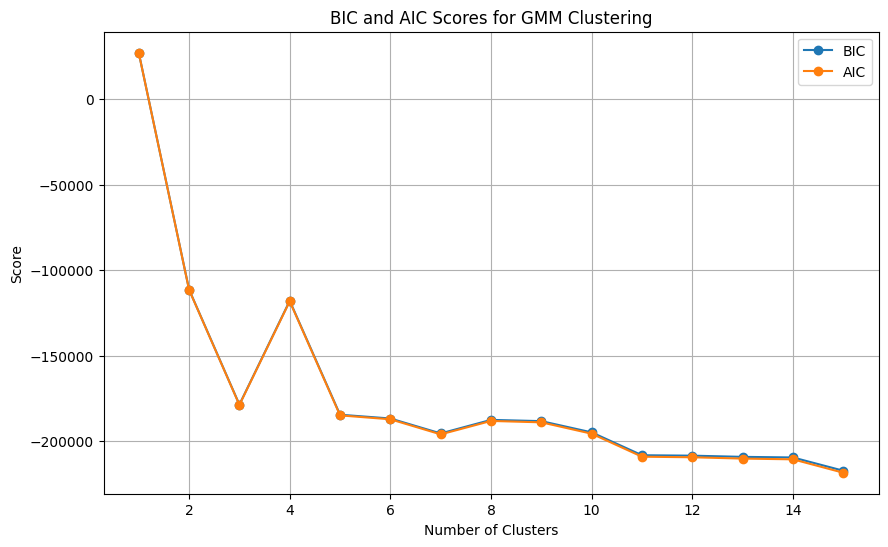

In [22]:
from sklearn.mixture import GaussianMixture




# Select the columns for clustering
X = df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']]

# Define the range of clusters to try
min_clusters = 1
max_clusters = 15  # Update with your desired maximum number of clusters
num_clusters_range = range(min_clusters, max_clusters + 1)

# Fit GMM models with varying numbers of clusters and calculate BIC/AIC
bic_scores = []
aic_scores = []
for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, bic_scores, marker='o', label='BIC')
plt.plot(num_clusters_range, aic_scores, marker='o', label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC Scores for GMM Clustering')
plt.legend()
plt.grid(True)
plt.show()


Execution Time: 0.389448881149292 seconds


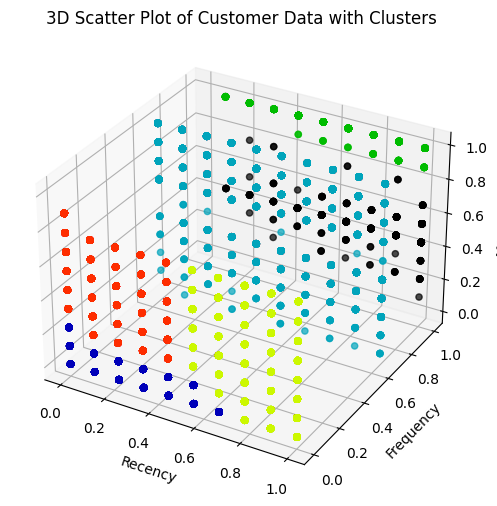

In [62]:
import seaborn as sns
import time
features = ["Recency_normalized", "Frequency_normalized", "Monetary_normalized"]
X = df2[features]

# Define the number of clusters (7)
n_clusters = 6

# Create the GMM model
start_time = time.time()
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to the data
gmm.fit(X)
end_time = time.time()
execution_time = end_time - start_time


print("Execution Time:", execution_time, "seconds")

# Predict cluster labels for each data point
clusters = gmm.predict(X)

# Add the cluster label as a new column to the data
df2["cluster"] = clusters

# 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Color-code data points by cluster
color_map = plt.cm.nipy_spectral(clusters / n_clusters)

# Scatter plot with color and transparency
ax.scatter(
    df2["Recency_normalized"], df2["Frequency_normalized"], df2["Monetary_normalized"], c=color_map, alpha=0.7
)

# Set labels and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot of Customer Data with Clusters")

plt.show()

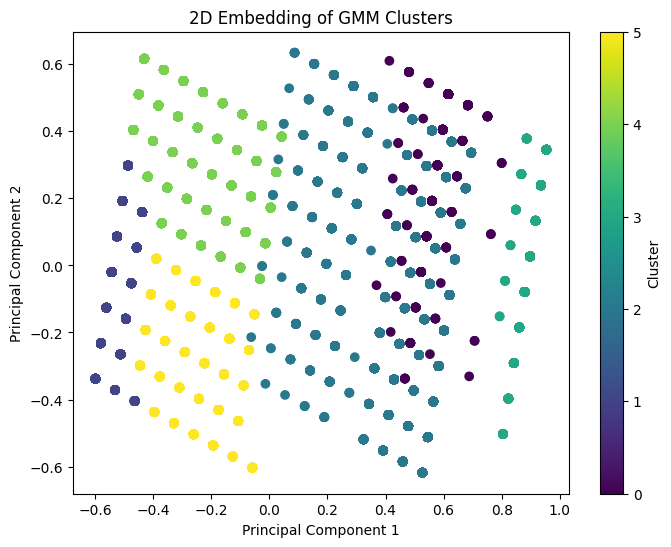

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm.predict(X), cmap='viridis')
plt.title('2D Embedding of GMM Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
clusters = gmm.predict(X)

# Add the cluster label as a new column to the data
df2["cluster"] = clusters

# Print the size of each cluster
cluster_sizes = df2["cluster"].value_counts()
print("Size of each cluster:")
print(cluster_sizes)

Size of each cluster:
cluster
2    5454
4    4655
5    4124
1    2840
3     946
0     463
Name: count, dtype: int64


In [26]:
cluster_sizes = []
cluster_centroids = []
cluster_medians = []
cluster_std = []
cluster_means = []

# Loop through each cluster
for cluster in range(n_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = X[gmm.predict(X) == cluster]

    # Compute statistics
    cluster_size = len(cluster_data)
    cluster_centroid = kmeans.cluster_centers_[cluster]
    cluster_median = np.median(cluster_data, axis=0)

    # Append statistics to respective lists
    cluster_sizes.append(cluster_size)
    cluster_centroids.append(cluster_centroid)
    cluster_medians.append(cluster_median)

    # Print statistics for the current cluster
    print(f"Cluster {cluster} - Size: {cluster_size}, Centroid: {cluster_centroid}, Median: {cluster_median}")

# Get the number of iterations
num_iterations = gmm.n_iter_
print("Number of Iterations:", num_iterations)

Cluster 0 - Size: 463, Centroid: [0.76146975 0.75314657 0.37359589], Median: [0.88888889 1.         0.44444444]
Cluster 1 - Size: 2840, Centroid: [3.44434046e-01 3.11963812e-04 1.14750689e-01], Median: [0.22222222 0.         0.11111111]
Cluster 2 - Size: 5454, Centroid: [0.2368947  0.69255928 0.8398292 ], Median: [0.55555556 0.66666667 0.77777778]
Cluster 3 - Size: 946, Centroid: [0.74331851 0.76199062 0.8819169 ], Median: [0.66666667 1.         1.        ]
Cluster 4 - Size: 4655, Centroid: [8.26470020e-01 5.55111512e-16 4.02574088e-01], Median: [0.77777778 0.         0.33333333]
Cluster 5 - Size: 4124, Centroid: [1.76928734e-01 7.82707232e-15 5.90653831e-01], Median: [0.22222222 0.         0.55555556]
Number of Iterations: 8


Average silhouette score: 0.2935092724876036


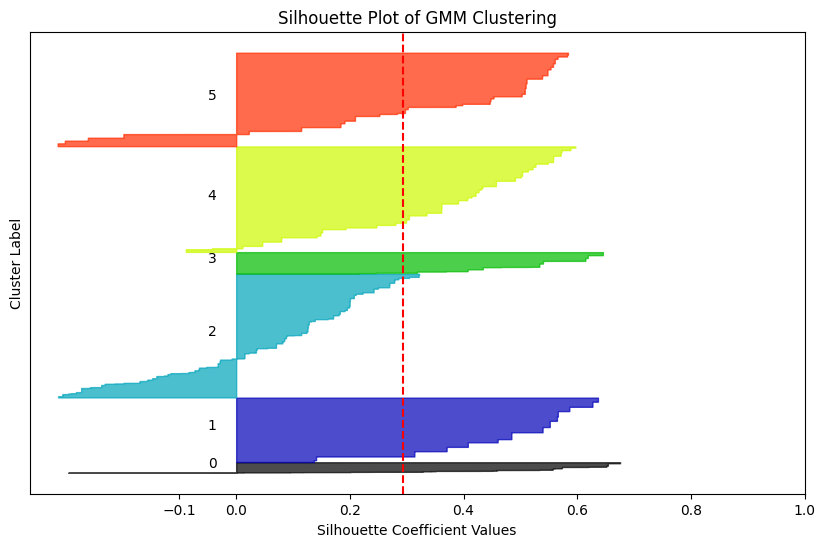

In [27]:
silhouette_avg = silhouette_score(X, clusters)
print("Average silhouette score:", silhouette_avg)

# Calculate silhouette values for each data point
silhouette_values = silhouette_samples(X, clusters)

# Create a silhouette plot
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette Plot of GMM Clustering")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [28]:
print("Cluster Centers:")
print(gmm.means_)

Cluster Centers:
[[0.79448363 1.         0.46116862]
 [0.30464857 0.         0.07348964]
 [0.53493868 0.66666667 0.72607261]
 [0.6400862  1.         0.99414541]
 [0.78527106 0.         0.37920686]
 [0.19958447 0.         0.51497797]]


In [29]:
pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=ec47a2143d700da26e5d3e3b766651f54e1efb8eccbbb7d22ba7bd8c8d408f88
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [30]:
#df2.drop(columns=['MostRecentOrderDate'], inplace=True)
df2 = df2.apply(pd.to_numeric, errors='coerce')
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

min_clusters = 2
max_clusters = 10
n_clusters_range = range(min_clusters, max_clusters + 1)

# Initialize lists to store FPC values
fpc_values = []

# Fit fuzzy c-means models with different numbers of clusters and calculate FPC
for n_clusters in n_clusters_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        df2, n_clusters, m=2, error=0.005, maxiter=1000, init=None
    )
    fpc_values.append(fpc)

# Find the optimal number of clusters based on the maximum FPC value
optimal_num_clusters = n_clusters_range[np.argmax(fpc_values)]

print("Optimal number of clusters based on FPC:", optimal_num_clusters)

Optimal number of clusters based on FPC: 2


In [31]:
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

# Assuming X contains your data
X = df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of clusters
n_clusters = 3

# Fuzzy C-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

# Predicted cluster labels
labels = np.argmax(u, axis=0)

# Add cluster labels to the DataFrame
df2['Cluster'] = labels

# Print FPC (Fuzzy Partition Coefficient)
print("Fuzzy Partition Coefficient (FPC):", fpc)

Fuzzy Partition Coefficient (FPC): 0.6098575638406654


exec:  0.6104648113250732


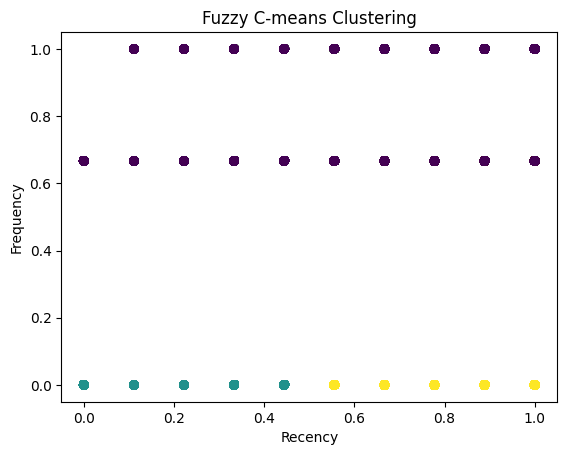

In [63]:
X = df2[['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of clusters
n_clusters = 3

# Fuzzy C-means clustering
start_time = time.time()
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)
end_time = time.time()
execution_time = end_time- start_time
print("exec: ", execution_time)
# Predicted cluster labels
labels = np.argmax(u, axis=0)

# Plot the data points with colors corresponding to their cluster memberships
plt.scatter(X['Recency_normalized'], X['Frequency_normalized'], c=labels, cmap='viridis')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Fuzzy C-means Clustering')

plt.show()

In [33]:
cluster_centroids = pd.DataFrame(cntr.T, columns=['Recency_normalized', 'Frequency_normalized', 'Monetary_normalized'])

# Analyze the properties of each cluster
for cluster_num in range(n_clusters):
    cluster_data = df2[df2['Cluster'] == cluster_num]
    common_characteristics = cluster_data.mode().iloc[0]
    print(f"Cluster {cluster_num} Properties:")
    print(f"Centroid: {cluster_centroids.iloc[cluster_num]}")
    print("Most Common Characteristics:")
    print(common_characteristics)
    print()

Cluster 0 Properties:
Centroid: Recency_normalized      0.193682
Frequency_normalized    0.784426
Monetary_normalized    -0.893092
Name: 0, dtype: float64
Most Common Characteristics:
CustomerID              11015.000000
MostRecentOrderDate              NaN
DaysSinceLastOrder        247.000000
SalesOrderCount             1.000000
TotalSalesAmount           40.000000
Recency                     0.000000
Frequency                   0.000000
Monetary                    1.000000
Recency_normalized          0.000000
Frequency_normalized        0.000000
Monetary_normalized         0.111111
Cluster                     0.000000
cluster                     5.000000
Name: 0, dtype: float64

Cluster 1 Properties:
Centroid: Recency_normalized      1.202727
Frequency_normalized   -0.603727
Monetary_normalized    -0.656374
Name: 1, dtype: float64
Most Common Characteristics:
CustomerID              11001.000000
MostRecentOrderDate              NaN
DaysSinceLastOrder         68.000000
SalesOrderCount

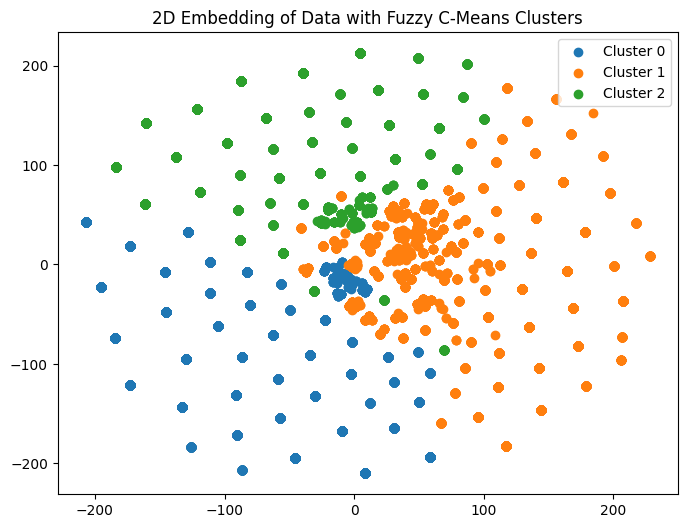

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# Plot the embedded data with cluster labels
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_embedded[df2['Cluster'] == i][:, 0], X_embedded[df2['Cluster'] == i][:, 1], label=f'Cluster {i}')
plt.title('2D Embedding of Data with Fuzzy C-Means Clusters')
plt.legend()
plt.show()

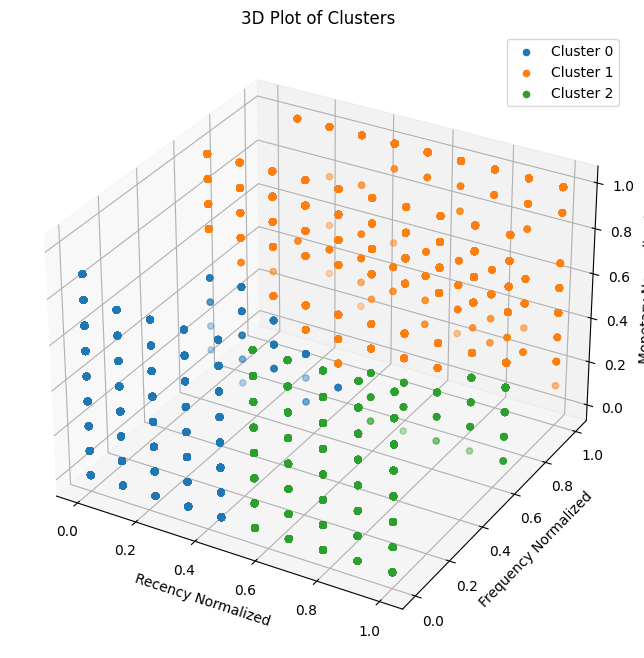

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for i in range(n_clusters):
    cluster_data = X[df2['Cluster'] == i]
    ax.scatter(cluster_data['Recency_normalized'], cluster_data['Frequency_normalized'], cluster_data['Monetary_normalized'], label=f'Cluster {i}')

# Set labels and title
ax.set_xlabel('Recency Normalized')
ax.set_ylabel('Frequency Normalized')
ax.set_zlabel('Monetary Normalized')
ax.set_title('3D Plot of Clusters')

# Add legend
plt.legend()

# Show plot
plt.show()

In [36]:
cluster_sizes = []
cluster_centroids = []
cluster_medians = []

# Loop through each cluster
for cluster in range(n_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = X[clusters == cluster]

    # Compute statistics
    cluster_size = len(cluster_data)
    cluster_centroid = gmm.means_[cluster]
    cluster_median = np.median(cluster_data, axis=0)

    # Append statistics to respective lists
    cluster_sizes.append(cluster_size)
    cluster_centroids.append(cluster_centroid)
    cluster_medians.append(cluster_median)

    # Print statistics for the current cluster
    print(f"Cluster {cluster} - Size: {cluster_size}, Centroid: {cluster_centroid}, Median: {cluster_median}")

# Get the number of iterations
num_iterations = gmm.n_iter_
print("Number of Iterations:", num_iterations)

Cluster 0 - Size: 463, Centroid: [0.79448363 1.         0.46116862], Median: [0.88888889 1.         0.44444444]
Cluster 1 - Size: 2840, Centroid: [0.30464857 0.         0.07348964], Median: [0.22222222 0.         0.11111111]
Cluster 2 - Size: 5454, Centroid: [0.53493868 0.66666667 0.72607261], Median: [0.55555556 0.66666667 0.77777778]
Number of Iterations: 8


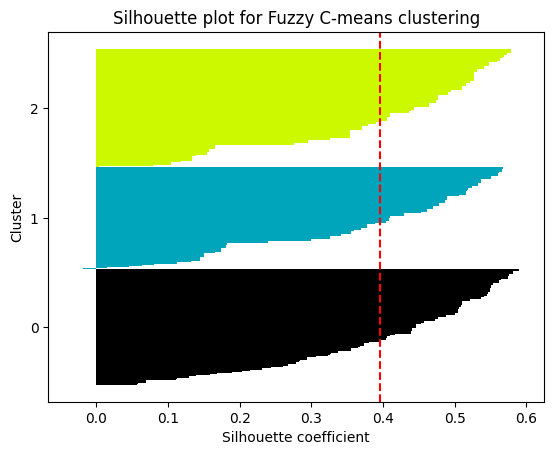

Average silhouette coefficient: 0.3961064122672317


In [37]:
silhouette_vals = silhouette_samples(X_scaled, labels)

# Create a silhouette plot
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    # Aggregate silhouette scores for samples in cluster i
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()

    # Compute y-axis range for this cluster
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, color=color)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

# Add silhouette score plot
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, range(n_clusters))
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette plot for Fuzzy C-means clustering')
plt.show()
print("Average silhouette coefficient:", silhouette_avg)


In [ ]:
cluster_sizes = df2['Cluster'].value_counts()

# Print the cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    6505
2    6377
1    5600
Name: count, dtype: int64


In [ ]:
print("Cluster Centers:")
print(cntr)

Cluster Centers:
[[-0.89296761 -0.65643946 -0.41550258]
 [ 0.78469047 -0.60362802 -0.58704431]
 [ 0.19339351  1.20270607  1.0008597 ]]
